In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt #plotting
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('201507-citibike-tripdata.csv')

In [4]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988,1


In [5]:
data1 = data[data.usertype=='Customer']
#data2 = data[data.usertype=='Subscriber']

In [6]:
data1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
8,1771,7/1/2015 00:01:25,7/1/2015 00:30:57,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,20171,Customer,NaN,0
10,1735,7/1/2015 00:01:50,7/1/2015 00:30:45,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,17543,Customer,NaN,0
17,951,7/1/2015 00:02:43,7/1/2015 00:18:35,212,W 16 St & The High Line,40.743349,-74.006818,498,Broadway & W 32 St,40.748549,-73.988084,16767,Customer,NaN,0
18,1352,7/1/2015 00:02:47,7/1/2015 00:25:20,328,Watts St & Greenwich St,40.724055,-74.009660,167,E 39 St & 3 Ave,40.748901,-73.976049,17003,Customer,NaN,0
21,383,7/1/2015 00:03:16,7/1/2015 00:09:39,2021,W 45 St & 8 Ave,40.759291,-73.988597,479,9 Ave & W 45 St,40.760193,-73.991255,14895,Customer,NaN,0


In [7]:
data1[ u'start station name'].value_counts()[0:10]
#data2[ u'start station name'].value_counts()

Central Park S & 6 Ave               5516
Centre St & Chambers St              4047
Grand Army Plaza & Central Park S    3889
West St & Chambers St                3453
12 Ave & W 40 St                     3195
Broadway & W 60 St                   3139
South End Ave & Liberty St           2325
Vesey Pl & River Terrace             2121
Broadway & W 58 St                   1905
Washington St & Gansevoort St        1771
Name: start station name, dtype: int64

In [8]:
data1[ u'end station name'].value_counts()[0:5]

Central Park S & 6 Ave               6124
Centre St & Chambers St              4388
Grand Army Plaza & Central Park S    3821
West St & Chambers St                3786
Broadway & W 60 St                   3597
Name: end station name, dtype: int64

## groupby start and end station

In [9]:
grouped = data1.groupby([u'start station id', u'end station id']).size()
grouped.to_csv('1.csv')
grouped = pd.read_csv('1.csv',header=None)

In [10]:
grouped.columns=['start station id','end station id','counts']

In [11]:
grouped.head()

,start station id,end station id,counts
0,72,72,40
1,72,128,4
2,72,147,3
3,72,150,1
4,72,153,3


## limit counts

In [12]:
grouped.head()

,start station id,end station id,counts
0,72,72,40
1,72,128,4
2,72,147,3
3,72,150,1
4,72,153,3


## delete edge which have the same station as their start and end.

In [13]:
grouped = grouped.drop('start station id'=='end station id')

In [14]:
data1.keys()

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

## merge with name,lati,longi

In [15]:
data_dic = data1[[u'start station id',u'start station name', u'start station latitude',
                  u'start station longitude', u'end station id', u'end station name',
                  u'end station latitude',u'end station longitude']]

In [16]:
data_dic.head()

,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
8,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119
10,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119
17,212,W 16 St & The High Line,40.743349,-74.006818,498,Broadway & W 32 St,40.748549,-73.988084
18,328,Watts St & Greenwich St,40.724055,-74.009660,167,E 39 St & 3 Ave,40.748901,-73.976049
21,2021,W 45 St & 8 Ave,40.759291,-73.988597,479,9 Ave & W 45 St,40.760193,-73.991255


In [17]:
dataset = pd.merge(grouped, data_dic, on=['start station id', 'end station id'])

In [18]:
dataset= dataset.drop_duplicates()

In [19]:
dataset.head()

,start station id,end station id,counts,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude
0,72,128,4,W 52 St & 11 Ave,40.767272,-73.993929,MacDougal St & Prince St,40.727103,-74.002971
4,72,147,3,W 52 St & 11 Ave,40.767272,-73.993929,Greenwich St & Warren St,40.715422,-74.011220
7,72,150,1,W 52 St & 11 Ave,40.767272,-73.993929,E 2 St & Avenue C,40.720874,-73.980858
8,72,153,3,W 52 St & 11 Ave,40.767272,-73.993929,E 40 St & 5 Ave,40.752062,-73.981632
11,72,168,1,W 52 St & 11 Ave,40.767272,-73.993929,W 18 St & 6 Ave,40.739713,-73.994564


In [20]:
data_nex = dataset[['start station id','end station id','counts']]

In [21]:
G=nx.from_pandas_dataframe(data_nex, u'start station id', u'end station id', u'counts',create_using=nx.DiGraph())

## add location data

In [22]:
st = pd.DataFrame({'Id':dataset['start station id'],'lat':dataset['start station latitude'],'lon':
                   dataset['start station longitude']}) 
et = pd.DataFrame({'Id':dataset['end station id'],'lat':dataset['end station latitude'],'lon':
                   dataset['end station longitude']}) 
df = [st,et]
df = pd.concat(df)

In [23]:
df = df.drop_duplicates()

In [24]:
df[df['Id']==120652]

,Id,lat,lon


## update location information

In [25]:
pos = nx.spring_layout(G)

In [26]:
df.head()

,Id,lat,lon
0,72,40.767272,-73.993929
550,79,40.719116,-74.006667
998,82,40.711174,-74.000165
1273,83,40.683826,-73.976323
1624,116,40.741776,-74.001497


In [27]:
for i in pos:
    for j in df.index:
        if df['Id'][j]==i:
            pos[i] = array([-df['lat'][j],df['lon'][j]])

## Viz

/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


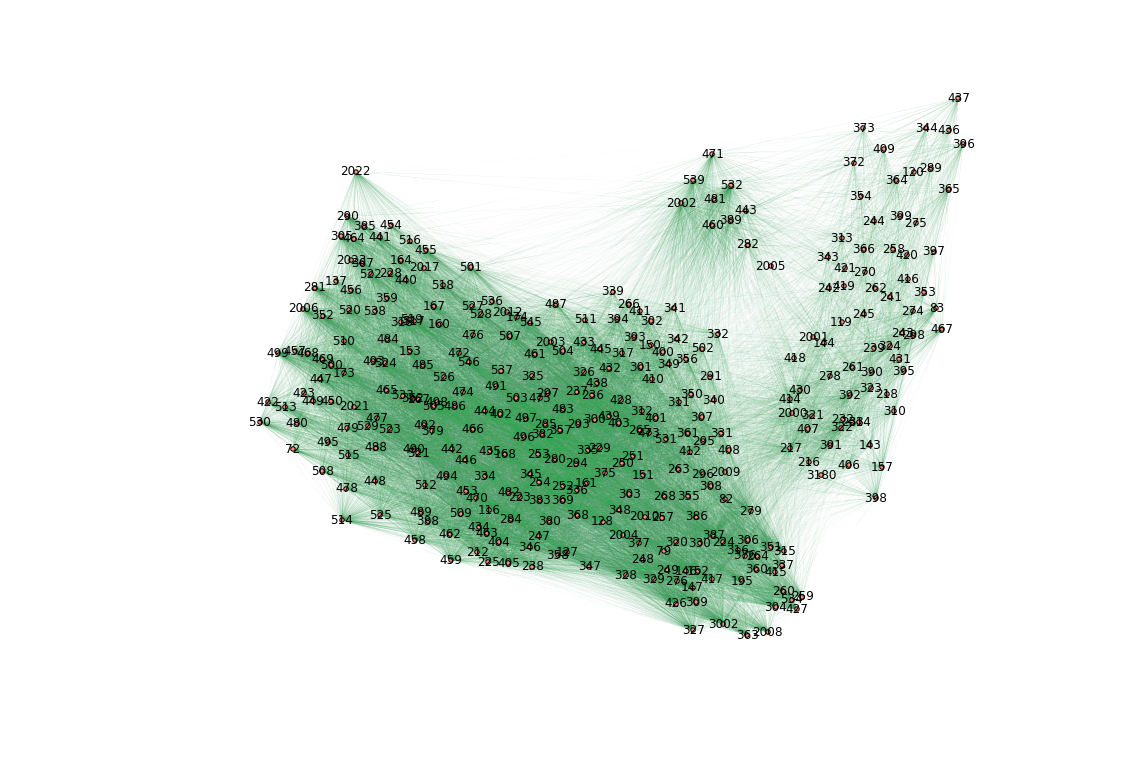

In [28]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,node_size=20,width=0.01,edge_color='#31a354')

In [29]:
df.to_csv('loc.csv')

In [30]:
sta_counts = pd.DataFrame(data1[ u'end station name'].value_counts())
sta_counts.to_csv('sta.csv')
sta_counts = pd.read_csv('sta.csv')
sta_counts.columns = ['end station name','totalcounts']

In [31]:
sta_counts

,end station name,totalcounts
0,Central Park S & 6 Ave,6124
1,Centre St & Chambers St,4388
2,Grand Army Plaza & Central Park S,3821
3,West St & Chambers St,3786
4,Broadway & W 60 St,3597
5,12 Ave & W 40 St,2873
6,South End Ave & Liberty St,2301
7,Broadway & W 58 St,2080
8,Vesey Pl & River Terrace,2002
9,W 20 St & 11 Ave,1915


In [32]:
dataset1 = dataset[['end station id','end station name','end station latitude','end station longitude']]
dataset1.columns = ['Id','end station name','end station latitude','end station longitude']
dataset1 = dataset1.drop_duplicates()

In [33]:
dataset1.head()

,Id,end station name,end station latitude,end station longitude
0,128,MacDougal St & Prince St,40.727103,-74.002971
4,147,Greenwich St & Warren St,40.715422,-74.011220
7,150,E 2 St & Avenue C,40.720874,-73.980858
8,153,E 40 St & 5 Ave,40.752062,-73.981632
11,168,W 18 St & 6 Ave,40.739713,-73.994564


In [34]:
dataset2 = pd.merge(sta_counts,dataset1,on=['end station name'])

In [35]:
dataset2.head()

,end station name,totalcounts,Id,end station latitude,end station longitude
0,Central Park S & 6 Ave,6124,2006,40.765909,-73.976342
1,Centre St & Chambers St,4388,387,40.712733,-74.004607
2,Grand Army Plaza & Central Park S,3821,281,40.764397,-73.973715
3,West St & Chambers St,3786,426,40.717548,-74.013221
4,Broadway & W 60 St,3597,499,40.769155,-73.981918


In [36]:
dataset2[dataset2['end station name'] == 'E 60 St & York Ave']

,end station name,totalcounts,Id,end station latitude,end station longitude
189,E 60 St & York Ave,354,2022,40.759107,-73.959223


In [37]:
dataset2.to_csv('total.csv')

In [38]:
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [39]:
c1= nx.degree(G)
topdict(c1,5)

1|151:461
2|387:461
3|497:445
4|426:429
5|285:424


In [40]:
c2= nx.eigenvector_centrality(G,weight='counts')
topdict(c2,5)

1|2006:0.949348029186
2|281:0.21999922878
3|499:0.174875257884
4|457:0.086949498263
5|173:0.0502263112833


In [41]:
from multiprocessing import Pool  
import itertools  

In [42]:
c3 = nx.betweenness_centrality(G,weight='counts')
topdict(c3,5)

1|317:0.00979167852262
2|251:0.00959995421554
3|412:0.00934121178878
4|403:0.00906824387274
5|361:0.00865774435806


In [43]:
c3[2022]

0.0029108492905016697

In [44]:
c4 = nx.closeness_centrality(G)
topdict(c4,5)

1|387:0.792270531401
2|151:0.771764705882
3|497:0.771764705882
4|444:0.74715261959
5|404:0.743764172336


In [46]:
c5 = nx.pagerank(G,0.9,weight='counts')
topdict(c5,5)

1|2006:0.0285870660266
2|387:0.0263995133632
3|281:0.0178700506448
4|426:0.0169326215569
5|499:0.01692513156


In [59]:
ind=sorted(c2, key=c2.get, reverse=True)
ind[0:5]

[2006, 281, 499, 457, 173]

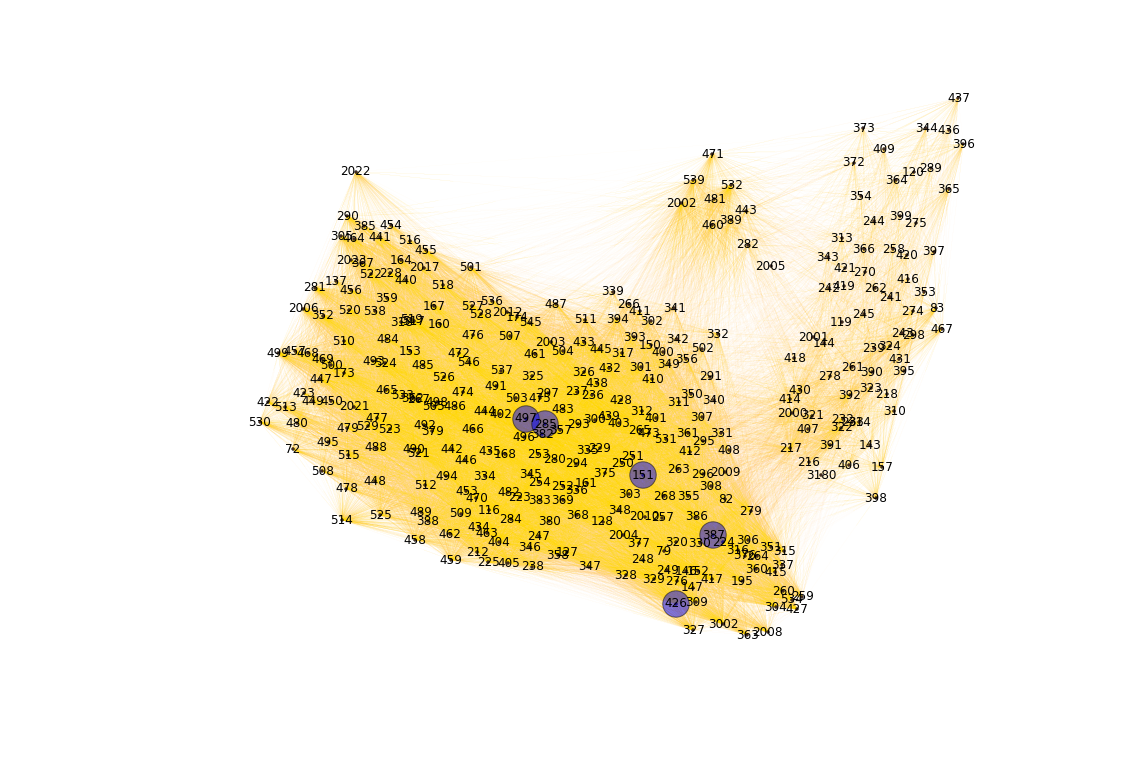

In [58]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,node_size=5,width=0.01,edge_color='gold')
path = ind[0:5]
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,with_labels=True,node_size=700,node_color='blue',alpha=0.5)

In [ ]:
ax1 = plt.figure(figsize=(30,20))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=False,node_size=5,width=0.01,edge_color='gold')
path = ind[0:5]
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,with_labels=True,node_size=700,node_color='blue',alpha=0.5)

In [ ]:
a= data_dic[data_dic['start station id']==217]

In [ ]:
from multiprocessing import Pool
import itertools

In [ ]:
G=nx.from_pandas_dataframe(data_nex, u'start station id', u'end station id', u'counts',create_using=nx.Graph())

In [ ]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [ ]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [ ]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [ ]:
import community

In [ ]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

In [ ]:
df2 = pd.DataFrame({'Id':parts.keys(),'label':parts.values()})
df2.head()

In [ ]:
print len(df)
print len(df2)
print len(pd.merge(df,df2))

In [ ]:
pd.merge(df,df2).to_csv('carto.csv')

In [ ]:
df.head()

In [ ]:
for i in range(len(values)):
    if values[i] == 0:
        values[i] = 'lightblue'
    elif values[i] == 1:
        values[i] = '#fc9272'
    else:
        values[i] = '#de2d26'

In [ ]:
ax1 = plt.figure(figsize=(20,15))
nx.draw_networkx(G, pos, cmap = plt.get_cmap("jet"), node_color = values, 
                 node_size = 200,with_labels=True,width=0.01,edge_color='gold',alpha=0.9)